
# Проведение А/В - тестирования для интернет магазина.

**Контекст:**
В проекте имитируется ситуация аналитики для крупного интернет-магазина.
Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

**Задачи:**

 - Приоритизировать гипотезы
 - Запустить A/B-тест
 - Проанализировать результаты

# Приоритизация гипотез

## Задача:
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

## Обзор данных

В таблице `hypothesis` представленно 9 гипотез для развития бизнеса. 
Для каждой гипотезы есть оценка по 10-ти бальной шкале показателей
- охвата `reach`
- велечины оказываемого влияния `impact`
- уверенности в оценке `confidence`
- трудоемковсть выполнения `efforts`

Используем фреймворки ICE и RICE для выбора наиболее преоритетных гипотез.

In [1]:
import pandas as pd
pd.options.display.max_colwidth = 120
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
display(hypothesis.head(10))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'] 
display(hypothesis[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False).round(2).head(5))

hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'] 
display(hypothesis[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False).round(2).head(5))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00


,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2


## Выводы

- В топ-5 после использования разных фреймворков оказались гипотезы 0, 2, 6, 7, 8. 
- Однако выраженность приоритета гипотез разная у разных фреймворков. Это связано с добавлением дополнительного фактора (охвата) в расчетах. Гипотеза 8, наиболее приоритетная по ICE имеет наименьший охват и получает значительно меньшую оценку по RICE. 
- Выбор между оценками ICE и RICE в конкретных ситуациях будет зависить от актуальных целей развития и охватов продукта.
- Выбирая гипотезы для дальнейшей разработки в данном случае стоит выбрать гипотезы 
  - №7 (на 5 пунктов слабее наиболее важной по ICE, и в два раза более приоритетная чем 2 место по RICE. Имеет наибольший охват
  - №0 По результатам работы обоих фреймворков находится в топ-3. Оказывает наибольшее влияние на пользователей.

# Анализ A/B-теста

### Задачи:
 - Оценка выручки, среднего чека и конверсии по группам
 - Оценка выбросов
 - Предварительная оценка различий в группах по среднему чеку и конверсии 
 - Фильтрация результатов теста в группах А и В, оценка различий по очищенным данным
 - Вывод и принятие решения

### Обзор и подготовка данных

В таблице `orders` представленна информация о заказах из интернет-магазина. Не содержит полных дубликатов или пропусков, необходима замена данных о дате заказа.

 - transactionId — идентификатор заказа;
 - visitorId — идентификатор пользователя, совершившего заказ;
 - date — дата, когда был совершён заказ;
 - revenue — выручка заказа;
 - group — группа A/B-теста, в которую попал заказ.
 
В таблице `visitors` данные о посетителях интернет-магазина.Не содержит полных дубликатов или пропусков, необходима замена данных о дате визита.
 - date — дата;
 - group — группа A/B-теста;
 - visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [4]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

def overview(data):
    display(data.head())
    display(data.info())
    print('Пропуски в данных:')
    print(data.isnull().sum())
    print('Полностью дублированных строк:')
    print(data.duplicated().sum())

In [5]:
overview(orders)


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

Пропуски в данных:
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
Полностью дублированных строк:
0


In [6]:
overview(visitors)


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

Пропуски в данных:
date        0
group       0
visitors    0
dtype: int64
Полностью дублированных строк:
0


In [7]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

### Вывод по результату предподготовки

- В таблицах представленны данные наблюдения проводимого А/В тестирования за 31 день (август 2019 года)
- В данных нет пропусков и полных дубликатов
- Колонки с данными о датах наблюдений приведены к типу datetime

Данные проверены и готовы к дальнейшему анализу.


## Оценка выручки, среднего чека и конверсии по группам
   - Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
   - Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
   - Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
   - Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
   - Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

In [8]:
# список дат проведения теста с группами
datesGroups = orders[['date','group']].drop_duplicates()
# Агрегированные данные по заказам: на каждую дату кумулятивное количество заказов, покупателей, выручка с указанием группы
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}),
    axis=1).sort_values(by=['date','group'])
# На каждую дату количество посетителей с указанием группы
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}),
    axis=1).sort_values(by=['date','group'])
#display(ordersAggregated.head())
#display(visitorsAggregated.head())

# сборный датасет с агрегированными данными
cumData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']).rename(columns={'transactionId' : 'orders', 'visitorId' : 'buyers'})
#cumData.head()

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


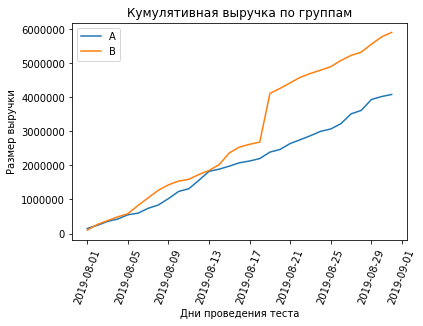

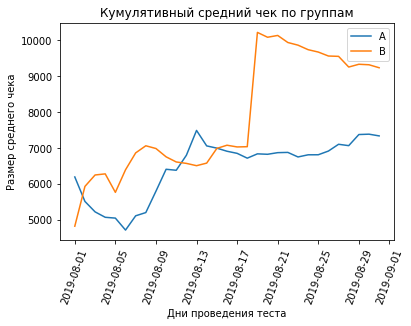

In [9]:
#сразу расчитаем конверсию
cumData['conversion'] = cumData['orders']/cumData['visitors']

# разделим на два датасета по группам теста А и В
cumDataA = cumData[cumData['group']=='A'][['date', 'revenue', 'orders','conversion']]
cumDataB = cumData[cumData['group']=='B'][['date', 'revenue', 'orders','conversion']]


plt.plot(cumDataA['date'], cumDataA['revenue'], label='A')
plt.plot(cumDataB['date'], cumDataB['revenue'], label='B')
plt.title('Кумулятивная выручка по группам') 
plt.ylabel('Размер выручки')
plt.xlabel('Дни проведения теста')
plt.xticks(rotation=70) 
plt.legend()
plt.show()

plt.plot(cumDataA['date'], cumDataA['revenue']/cumDataA['orders'], label='A')
plt.plot(cumDataB['date'], cumDataB['revenue']/cumDataB['orders'], label='B')
plt.title('Кумулятивный средний чек по группам') 
plt.ylabel('Размер среднего чека')
plt.xlabel('Дни проведения теста')
plt.xticks(rotation=70) 
plt.legend()
plt.show()

#не могу понять природу ошибки в нижнем блоке...Делала локально проект, в эту тетрадку просто копировала, локально ошибка не появлялась..

**Выручка**
 - в начале проведения теста выручка в обеих группах была приблизительно равна, но с 17 августа в группе В произошел резкий скачок
 - Вторую половину теста группа В лидирует по выручке за счет скачка в кусулятивных данных

**Средний чек**
 - В начале теста средний чек в группах колеблется
 - После 17 августа, когда проишел резкий скачок выручки, наблюдается резкое увеличение среднего чека
 - После скачка данные не стабилизировались, начался спад
 
 Гипотеза: 17 августа было некоторое количество аномально больших заказов, повлиявших на кумулятивные данные

,date,revenueA,ordersA,conversionA,revenueB,ordersB,conversionB
0,2019-08-01,148579,24,0.033380,101217,21,0.029453
1,2019-08-02,242401,44,0.032885,266748,45,0.034776
2,2019-08-03,354874,68,0.036856,380996,61,0.033833
3,2019-08-04,425699,84,0.032787,489567,78,0.030315
4,2019-08-05,549917,109,0.032851,581995,101,0.030793


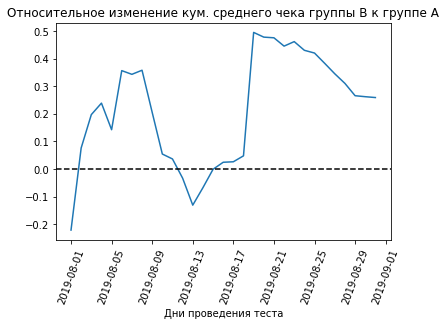

In [10]:
cumRevenue = cumDataA.merge(cumDataB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
display(cumRevenue.head())

plt.plot(cumRevenue['date'], (cumRevenue['revenueB']/cumRevenue['ordersB'])/(cumRevenue['revenueA']/cumRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кум. среднего чека группы В к группе А')
plt.xlabel('Дни проведения теста')
plt.xticks(rotation=70) 
plt.show()

 - Относительные изменения среднего чека в группе В колеблются
 - К середине месяца средний чек группы В резко падает и становится меньше, чем в группе В
 - После аномалии 17 августа есть резкий скачок с дальнейшим медленным спадом
 - Данные не стабилизировались. 
 
 Относительно группы А в группе В средний чек имеет некоторую тенденцию к снижению 

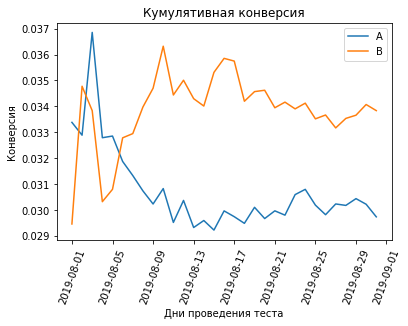

In [11]:
plt.plot(cumDataA['date'], cumDataA['conversion'], label='A')
plt.plot(cumDataB['date'], cumDataB['conversion'], label='B')
plt.xticks(rotation=70)
plt.title('Кумулятивная конверсия')
plt.ylabel('Конверсия')
plt.xlabel('Дни проведения теста')
plt.legend()
plt.show()

- В начале тестирования присутствуют колебания конверсии
- В 10 числах августа данные начинают стабилизироваться
- Конверсия в группе В больше, чем группе А

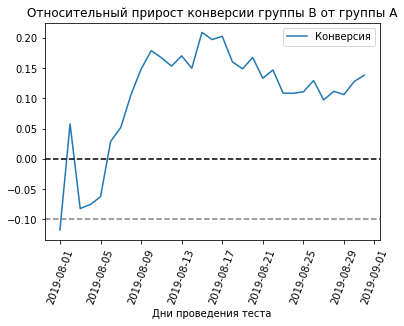

In [12]:
CumConversions = cumDataA[['date','conversion']].merge(
    cumDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(CumConversions['date'], CumConversions['conversionB']/CumConversions['conversionA']-1, label='Конверсия')
plt.title('Относительный прирост конверсии группы B от группы A')
plt.xlabel('Дни проведения теста')
plt.xticks(rotation=70) 
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.show()

- После флуктуаций в начале теста конверсия в группе В растет и стабилизируется
- По оценке графика можно предполагать, что в группе В конверсия может быть на 15-20% больше 

## Оценка выбросов
 - Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
 - Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
 - Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
 - Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

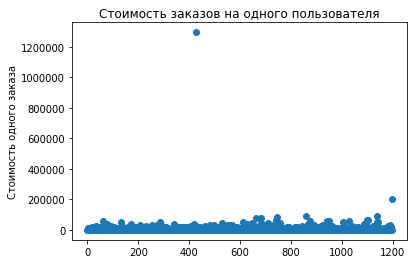

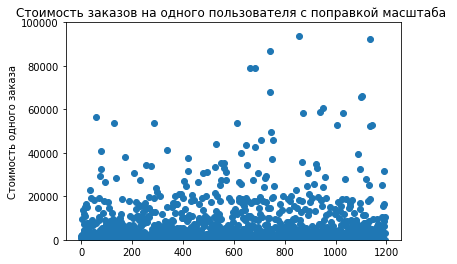

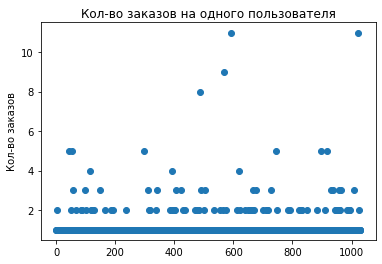

In [22]:
#display(orders.head())

#
y_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(y_values, orders['revenue'])
#plt.ylim(0, 200000)
plt.title('Стоимость заказов на одного пользователя')
plt.ylabel('Стоимость одного заказа')
plt.show()
#Есть сверхдорогие заказы дороже 200 тысяч и один даже дороже миллиона, но оставшиеся заказы сливаются в линию ниже 100000


#Добавим график с поправкой масштаба
plt.scatter(y_values, orders['revenue'])
plt.ylim(0, 100000)
plt.title('Стоимость заказов на одного пользователя с поправкой масштаба ')
plt.ylabel('Стоимость одного заказа')
plt.show()

orders_per_users = orders.drop(
    ['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'}).rename(
    columns = {'transactionId' : 'orders'})

#orders_per_users.head()

x_values = pd.Series(range(0,len(orders_per_users)))

plt.scatter(x_values, orders_per_users['orders'])
plt.title('Кол-во заказов на одного пользователя')
plt.ylabel('Кол-во заказов')
plt.show()

**Стоимость заказа**
- На графике по всем данным сложно делать выводы.Можно указать два сверходорогих заказа, остальные данные сливаются
- Отсечем эти аномалии с графика изменив масштаб. Видно, что большая часть заказов в основном ниже отметки в 20-25 тысяч 

**Количество заказов**
- Чаще всего покупают 1 или 2 раза, но есть пользователи, совершившие и больше 8 заказов.

In [14]:
print('95 и 99 перцентили для стоимости заказов:', np.percentile(orders['revenue'], [95, 99]))
print('95 и 99 перцентели для количества заказов на одного пользователя:', np.percentile(orders_per_users['orders'], [95, 99]))


95 и 99 перцентили для стоимости заказов: [28000.  58233.2]
95 и 99 перцентели для количества заказов на одного пользователя: [2. 4.]


**Граница аномальных данных**
- Примем за выбросы по 5% данных от максимальных.
- Таким образом, граница для стоимости заказа будет 28 тысяч, а для количества заказов на пользователя - не больше 2

##  Предварительная оценка различий в группах по среднему чеку и конверсии 
- Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.


## Гипотезы 

В тесте для двух несвязанных выборок будем оценивать статистическую значимость между группами U- критерием Манна-Уитни. Проведем оценку различий по следующим показателям:
1. Конверсия
2. Средний чек.

Для каждой проверки будут следующие гипотезы:
 - H0 Между группами А и В нет различий по оцениваемому показателю.
 - H1 Между группами А и В есть различия по оцениваемому показателю. 
 
При наличии статистически значимых различий их отношения (в какой группе показатель больше) оценивается по относительной разнице этого показателя группы В к группе А.

In [15]:
# из группы с визитами на сайт создаем список посетителей из групп

#visitorsADaily = visitors.query('group == "A"').drop(['group'], axis=1).rename(columns = {'visitors' : 'visitorsPerDateA'})
#другой способ сборки
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']].rename(columns = {'visitors' : 'visitorsPerDateA'})
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']].rename(columns = {'visitors' : 'visitorsPerDateB'})

#количество заказов на каждый ID по группам
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
ordersByUsersB.columns = ['userId', 'orders']

# массивы для анализа, где не комбинированны покупатели и посетители (0 заказов)
sampleA = pd.concat(
    [ordersByUsersA['orders'], 
     pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
               name='orders')],axis=0)

sampleB = pd.concat(
    [ordersByUsersB['orders'],
     pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
               name='orders')],axis=0)

In [16]:
print('p-value различий в конверсии между группами А и В =', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительная разница конверсии группы В по отношению к группе А =',"{0:.1%}".format(sampleB.mean()/sampleA.mean()-1))

p-value различий в конверсии между группами А и В = 0.008
Относительная разница конверсии группы В по отношению к группе А = 13.8%


**Сырые различия по конверсии**
- Между группами есть статистически значимые различия.
- Конверсия в группе В больше на 13.8% процентов.

In [17]:
print('p-value различий в среднем чеке между группами А и В =',"{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительная разница среднего чека группы В по отношению к группе А =',"{0:.1%}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value различий в среднем чеке между группами А и В = 0.365
Относительная разница среднего чека группы В по отношению к группе А = 25.9%


**Средний чек по сырым данным**
 - Между группами нет значимых различий
 - Но в сырых данных есть значения о том, что в группе В чек больше на 25%. 
 
 Так как относительный рост среднего чека на четверть в группе В не считаем статистически значимым, проведем анализ без аномалий. Зафиксированный на графиках скачок 17 августа мог повлиять на этот показатель. Стоит проверить, будут ли группы все еще не различаться без учета сверх-дорогих заказов.

## Фильтрация результатов теста в группах А и В, оценка различий по очищенным данным
- Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

## Гипотезы 

На данном этапе проводим перепроверку оценки различий между группами, аналогичную предыдущей, но не учитываем аномальные данные.
В тесте для двух несвязанных выборок будем оценивать статистическую значимость между группами U- критерием Манна-Уитни. Проведем оценку различий по следующим показателям:
1. Конверсия
2. Средний чек.

Для каждой проверки будут следующие гипотезы:
 - H0 Между группами А и В нет различий по оцениваемому показателю.
 - H1 Между группами А и В есть различия по оцениваемому показателю. 
 
При наличии статистически значимых различий их отношения (в какой группе показатель больше) оценивается по относительной разнице этого показателя группы В к группе А.

In [18]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print('Количество аномальных пользователей', abnormalUsers.shape)

Количество аномальных пользователей (68,)


In [19]:
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],
    axis=0)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],
    axis=0)

In [20]:
print('p-value различий в конверсии между группами А и В (без аномалий) =', "{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительная разница в конверсии группы В к А (без аномалий) =',"{0:.1%}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value различий в конверсии между группами А и В (без аномалий) = 0.006
Относительная разница в конверсии группы В к А (без аномалий) = 20.4%


**Конверсия**
 - В группе В конверсия все еще статистически значимо больше, чем в группе А
 - Относительный прирост составляет 20%

In [21]:
print('p-value различий в среднем чеке между группами А и В (без аномалий)',"{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('Относительная разница среднего чека в группе В к А (без аномалий)',"{0:.1%}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-value различий в среднем чеке между группами А и В (без аномалий) 0.394
Относительная разница среднего чека в группе В к А (без аномалий) -1.7%


**Средний чек**
- После удаления из данных аномально дорогих заказов относительная разница среднего чека уменьшилась, хотя по сырым данным в группе В чек был на 25% процентов больше
- Таким образом, относительный прирост в 25% от группы А был обусловлен 5% сверхдорогих заказов, случившихся предположительно 17 августа
- По среднему чеку в группах А и В нет статистических различий

# Вывод и принятие решения по результатам тестирования
   
   - Конверсия в группе В значимо больше, чем в группе А
     -  условия, представленные группе В значимо увеличивают конверсию, способствуют совершению заказа.
   - По среднему чеку значимых различий не зафиксировано
   - Средний чек в группе В не успел стабилизироваться из-за аномалий, возникших в середине тестирования
   
### Тест следует прожолжить.
 - Дать возможность среднему чеку стабилизироваться в группах
 - Не смотря на имеющиеся выводы о конверсии в группах, это возможность проверить в долгосрочной перспективе бОльшую конверсию группы В - останутся ли показатели на том же уровне, или сработал некий фактор новизны
  

# Общий вывод

В работе была проведена приоритезация 9-тигипотез для дальнейшего тестирования.

 - Были применены фреймворки ICE и RICE.
 - Фреймворки по разному ранжируют приоритет гипотезы из-за особенностей расчета оценки.
 - RICE выделяет наиболее приоритетные гипотезы с учетом охвата пользователей, которых затронет изменение.
 - Выбор решающей системы оценки гипотез зависит от целей компании на данный момент и особенностей бизнеса. Для каждой системы выделены топ-3 приоритетных гипотез.
 - Выбирая гипотезы сбалансированно между фреймворками ICE и RICE для дальнейшей работы подходят гипотезы № 7 или № 0.
 
Анализ результатов проведенного А/В тестирования.
1. Расчет кумулятивных показателей.
   - Конверсия в группах стабилизировалась, на графиках виден больший рост конверсии в группе В. График относительных изменений подтверждает это.
   - Выручка и средний чек соответственно не стабилизировались до конца. По графикам можно говорить о росте показателей для группы В, но так же видна серьезная аномалия, произошедшая в середине тестирования. Этот фактор надо учитывать, как способный исказить результаты.
   
   
2. Сравнение выбранных метрик (конверси и средний чек) в группах
   - Разница между группами по конверсии статистически значимая, в группе В конверсия на 14% больше.
   - Разница в отношении среднего чека статистически незначимая, ни одна из групп не заработала "больше" за оцениваемый период, хотя расчет относительных различий показывает, что в группе В средний чек больше на 25%. Необходим анализ аномалий.
   
   
3. Анализ аномальных значений в данных.
   - На графиках рассеивания заметно некоторое количество точек-аномалий, небольшого количества сверхбольших значений для выбранных метрик. Это как слишком большое количество заказов на одного покупателя, так и сверхдорогие заказы. Для обеих метрик аномалии могли повлиять на расчет различий.
   - После выделения перцентелей для обеих метрик мы отсекли по 5% самых данных.
   
   
4. Сравнение метрик в очищенных данных.
   - После очистки данных конверсия в группах статистически отличается. Расчет относительных показателей показывает, что в группе В конверсия на 20% больше.
   - В отношении среднего чека все еще нет значимых различий, а относительные показатели стали показывать, что группа Б заработала на 1.7% меньше без учета сверхдорогих заказов.
   
   
Тест необходимо продолжать, для стабилизации показателей среднего чека и выручки.